### Question 2)
Design a linear regression model using normal equations for the data of COVID-19 deaths for India for the month of May-July, 2020 and from here predict the COVID-19  deaths for the month of August, 2020. Hence calculate the validation error.

In [119]:
#loading required packages
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt
import numpy as np

## Collecting Data  From Url (Automated) (using concept from question 1)

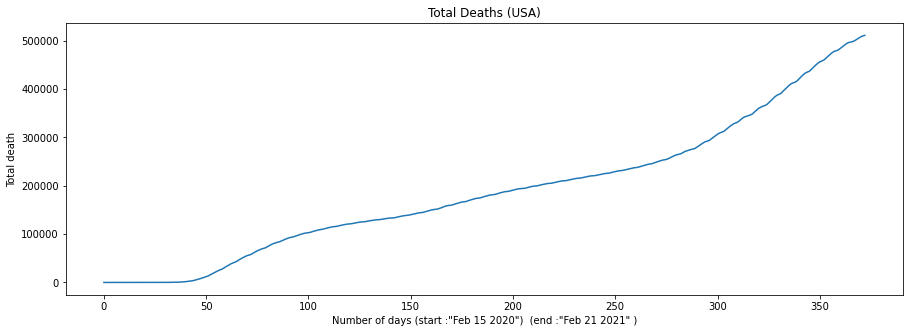

In [154]:
#get data from url
def getDataFromUrl(url):
    headers = headers = {'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"}
    response = requests.request("GET",url,headers = headers)
    data = BeautifulSoup(response.text,'html.parser')
    return data

#URLs from which data has to be collected
url={}
url['USA'] = "https://www.worldometers.info/coronavirus/country/us/"
#url['Brazil'] = "https://www.worldometers.info/coronavirus/country/brazil/"
#url['India'] = "https://www.worldometers.info/coronavirus/country/india/"
country = "USA"
#country = "Brazil"
#country = "India"

#collect x,y from site
def getXAndY(data):
    data = str(data)
    a,b,c,d = data.find("categories"),data.find("yAxis"),data.find("data"),data.find("responsive")
    x =data[a+1:b]
    a,b = x.find("["),x.find("]")
    x=x[a+1:b].split(",")
    X = []
    i=0
    while(i<len(x)):
        X.append(x[i]+x[i+1])
        i = i+2
    y = data[c+1:d]
    c,d = y.find("["),y.find("]")
    Y = y[c+1:d].split(",")
    return X,Y

#processing part of data from url 
#plotting the data
def processAndPlot(cards_data,country):
    data_cases = cards_data[0].find('script')
    data_death = cards_data[3].find('script')
    x1,y1 = getXAndY(data_cases)
    x2,y2 = getXAndY(data_death)

    x = []
    for i in range(len(x1)):
        x.append(i)
    y2 = [int(y) for y in y2]
    y1 = [int(y) for y in y1]
    
    
    f = plt.figure()
    f.set_figwidth(15) 
    f.set_figheight(5)
    plt.title("Total Deaths ("+country+")")
    plt.xlabel("Number of days (start :"+x2[0]+")  (end :"+x2[-1]+" )")
    plt.ylabel("Total death")
    plt.plot(x,y2)
    plt.show()
    return x2,y2

#plotting graph 

url_country = url[country]
data = getDataFromUrl(url_country)
cards_data = data.find_all('div',attrs={'class','col-md-12'})
x,y =processAndPlot(cards_data,country)
x=[j[1:-1] for j in x]

### Slicing data From May to August From total data
May - July : Training and validation\
August : Testing

In [156]:
start_index = x.index('May 01 2020')
end_index = x.index('Jul 31 2020')
x_data = x[start_index:end_index+1]
y_data = y[start_index:end_index+1]
start_index_test = x.index('Aug 01 2020')
end_index_test = x.index('Aug 31 2020')
x_test_date = x[start_index_test:end_index_test+1]
y_test = y[start_index_test:end_index_test+1]


### Splitting training dataset for validation
Every index that is multiple of 3 is put aside as validation data

In [157]:
x_valid_date=[]
x_valid=[]
y_valid=[]

x_train=[]
x_train_date=[]
y_train=[]


i=0
for i in range(len(x_data)):
    if i%3==0:
        x_valid_date.append(x_data[i])
        x_valid.append(i)
        y_valid.append(y_data[i])
    else:
        x_train_date.append(x_data[i])
        x_train.append(i)
        y_train.append(y_data[i])
x_test = [k for k in range(i+1,i+32)]

### Some additional processing of data
Adding x0=1 for every data unit in matrix as h(x) = w0 + w1(x)

In [158]:
#adding column of 1  as x0 = 1
#hw(x) =w0 + w1x
x_train,y_train=np.array(x_train),np.array(y_train)
x_valid,y_valid=np.array(x_valid),np.array(y_valid)
x_test,y_test =np.array(x_test),np.array(y_test)
one = np.ones((x_train.shape[0],2))
x_train=x_train.reshape(x_train.shape[0],1)
print(one.shape,x_train.shape)
one[:,1:]=x_train[:,0:]
x_train = one

one = np.ones((x_valid.shape[0],2))
x_valid=x_valid.reshape(x_valid.shape[0],1)
one[:,1:]=x_valid[:,0:]
x_valid = one

one = np.ones((x_test.shape[0],2))
x_test =x_test.reshape(x_test.shape[0],1)
one[:,1:]=x_test[:,0:]
x_test = one


(61, 2) (61, 1)


### Calculation of weight through Normal equation through function

In [160]:
# ridge Regression
def Normal_Linear_Regression(x,y):
    m,n = x.shape
    y = y.reshape(m,1)
    # w = (x'x)-1 * x,y
    p = np.matmul(x.T,x)
    p = np.linalg.inv(p)
    w = np.matmul(p,np.matmul(x.T,y))
    return w

In [161]:
w =Normal_Linear_Regression(x_train,y_train)
print(w.shape)
print(w)

(2, 1)
[[79249.54408602]
 [  861.28155168]]


### defining hypothesis , cost function and prediction as function

In [162]:
def h_func(x,w):
    return np.dot(x,w)

def cost_func(x,y,w):
    m,n=x.shape
    y = y.reshape(m,1)
    return np.sum((h_func(x,w)-y)**2)/(2*m)

## Plotting graph for deaths for training and hypothesis FOR TRAINING AND VALIDATION DATA

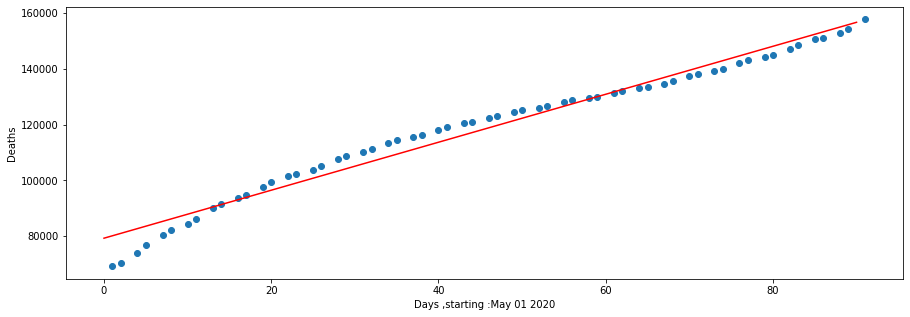

In [163]:
h = h_func(x_valid,w)
f= plt.figure()
f.set_figwidth(15) 
f.set_figheight(5)
plt.xlabel("Days ,starting :"+x_data[0])
plt.ylabel("Deaths")
plt.scatter(x_train[:,1:2],y_train)             # training 
plt.plot(x_valid[:,1:2].flatten(),h,color="red")   # validation
plt.show()

## Predict Deaths on Any day in August

In [164]:
def predict(date,w):
    day = x.index(date)
    day_zero = x.index('May 01 2020')
    print(day-day_zero)
    xi = day-day_zero
    xi = np.array([1,xi])
    return h_func(xi,w)[0]
    
Date = 'Aug 06 2020'
print("Predicted Deaths on",Date," :",predict(Date,w))

Date = 'Aug 15 2020'
print("Predicted Deaths on",Date," :",predict(Date,w))

97
Predicted Deaths on Aug 06 2020  : 162793.8545994614
106
Predicted Deaths on Aug 15 2020  : 170545.38856462593


## Plotting graph for Testing data (i.e August)

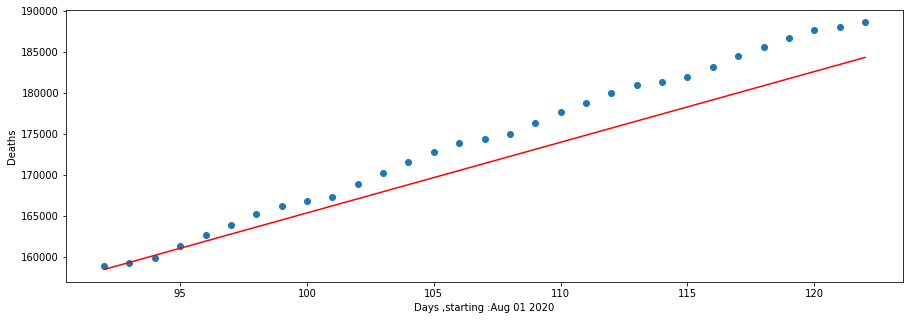

In [165]:
h = h_func(x_test,w)
f= plt.figure()
f.set_figwidth(15) 
f.set_figheight(5)
plt.xlabel("Days ,starting :"+x_test_date[0])
plt.ylabel("Deaths")
plt.scatter(x_test[:,1:2],y_test)
plt.plot(x_test[:,1:2].flatten(),h,color="red")
plt.show()


## Computing Validation Error

In [166]:
cost_func(x_valid,y_valid,w)

8345450.675220406

## Observations:
1.Prediction of August month , Error in prediction for USA is more than for brazil(change url and Country for brazil).\
2.Validation Error for USA is higher compared to Brazil.\
3.Hypothesis for USA is slightly underfit , to resolve this h(x) = w0 + w1(x) +w2($x^2)$ + .... can be used

\begin{equation}
\end{equation}

## \begin{matrix}
\sum _{i=1}^{i=m} \frac{x}{y}
\end{matrix}